In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Importing the Dataset

In [ ]:
houses = pd.read_csv('real_estate_dataset.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
houses = houses.drop(['ID'], axis=1)

In [ ]:
houses

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...
495,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


In [ ]:
current_year = 2024
houses['Age'] = current_year - houses['Year_Built']

houses

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price,Age
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747,57
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386,75
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880,101
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996,106
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523,25
...,...,...,...,...,...,...,...,...,...,...,...,...
495,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722,57
496,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717,47
497,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201,20
498,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028,84


# Separating Features

In [ ]:
x = houses[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Age', 'Has_Garden', 'Has_Pool', 'Garage_Size']]
y = houses['Price']

# Creating OLS Model and Splitting Dataset

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

R-squared of OLS Model

In [ ]:
ols.score(X_test, y_test)

0.9494027723774041

# Lasso Time!!

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [ ]:
lasso.score(X_test, y_test)

0.9494027416739117

# Ridge Time!!!

In [ ]:
ridge = Ridge(alpha=1.0) # You can adjust the alpha value
ridge.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)
print(f"Ridge Regression R-squared: {ridge_score}")

Ridge Regression R-squared: 0.9491535222172613


# Cost of your Dream Home

In [ ]:
user_bedrooms = float(input('How many bedrooms do you want? '))
user_bathrooms = float(input('How many bathrooms do you want? '))
user_square_feet = float(input('How large do you want your home to be in sq. ft? '))
user_floors = float(input('How many floors do you want? '))
user_garden = float(input('Do you want a garden? '))
user_pool = float(input('Do you want a pool? '))
user_age = float(input('How old do you want the house to be? '))
user_garage = float(input('How large do you want the garage to be? '))

How many bedrooms do you want? 1
How many bathrooms do you want? 1
How large do you want your home to be in sq. ft? 100
How many floors do you want? 1
Do you want a garden? 0
Do you want a pool? 0
How old do you want the house to be? 100
How large do you want the garage to be? 15


In [ ]:
ols.predict([[user_square_feet, user_bedrooms, user_bathrooms, user_floors, user_age, user_garden, user_pool, user_garage]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([258975.35770144])

In [ ]:
print(ols.coef_)
print(lasso.coef_)
ridge.coef_

[  993.66512217 50159.57559121 30609.95491003 19219.90852811
 -1501.837144   29864.66402046 40167.08746251  1135.51180685]
[  993.6653219  50159.05716603 30608.04833574 19218.13046902
 -1501.83456717 29860.24904276 40162.46751447  1135.48865113]


array([  993.66168658, 50093.4291168 , 30459.05609484, 19127.52934523,
       -1501.59217252, 29528.45142362, 39727.63043479,  1134.34928545])

In [ ]:


print(f"OLS Intercept (beta-0): {ols.intercept_}")
print(f"Lasso Intercept (beta-0): {lasso.intercept_}")
print(f"Ridge Intercept (beta-0): {ridge.intercept_}")

OLS Intercept (beta-0): 192770.44375172292
Lasso Intercept (beta-0): 192784.40035638877
Ridge Intercept (beta-0): 193864.02289274603


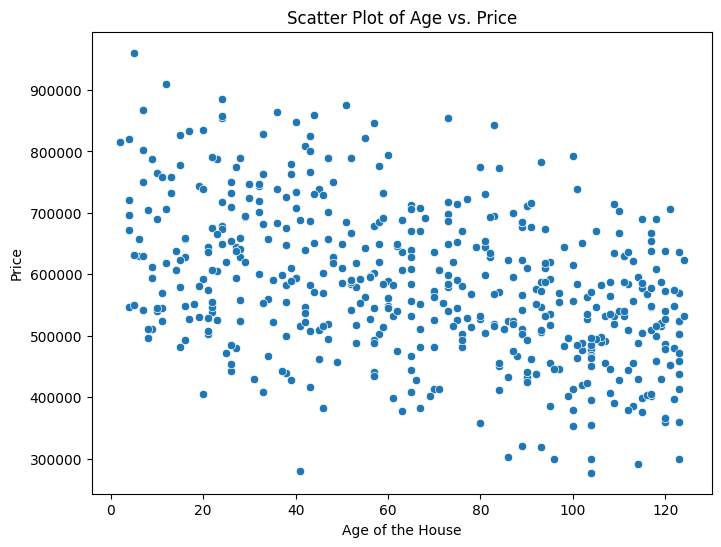

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Price', data=houses)
plt.title('Scatter Plot of Age vs. Price')
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.show()